<a href="https://colab.research.google.com/github/abequette/CS167Fall22Code/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Alec Bequette

Proposed Points (out of 25):
Problem: 2/2
Data Preparation: 2/2
Research: /10
Analysis: /10
Bumps in the Road: /1

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

Using Taylor Swift Spotify data, I would like to analyze several aspects of each song and classify which album each song is on. The data comes from Kaggle and describes when the song came out, the volume, energy, danceability, acousticness, if it's explicit, etc. 

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Mounted at /content/drive


*your answer here*

In [2]:
# load and prepare your data here

# import libraries
import sklearn
import pandas as pd
import numpy
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline

# load data
full_ts_data = pd.read_csv('/content/drive/MyDrive/CS167/Taylor Swift Spotify Data.csv')


In [ ]:
full_ts_data.head()

track_name              album_name  explicit   artist_name  \
0                      22    Red (Deluxe Edition)     False  Taylor Swift   
1        ...Ready For It?              reputation     False  Taylor Swift   
2   22 (Taylor's Version)  Red (Taylor's Version)     False  Taylor Swift   
3  A Perfectly Good Heart            Taylor Swift     False  Taylor Swift   
4   A Place in this World            Taylor Swift     False  Taylor Swift   

                artist_id                album_id album_type  \
0  06HL4z0CvFAxyc27GXpf02  1KlU96Hw9nlvqpBPlSqcTV      album   
1  06HL4z0CvFAxyc27GXpf02  6DEjYFkNZh67HP7R9PSZvv      album   
2  06HL4z0CvFAxyc27GXpf02  6kZ42qRrzov54LcAk4onW9      album   
3  06HL4z0CvFAxyc27GXpf02  5eyZZoQEFQWRHkV2xgAeBw      album   
4  06HL4z0CvFAxyc27GXpf02  5eyZZoQEFQWRHkV2xgAeBw      album   

  album_release_date  album_release_year album_release_date_precision  ...  \
0         10/22/2012                2012                          day  ...   
1         11/10/2017                2017                          day  ...   
2         11/12/2021                2021                          day  ...   
3         10/24/2006                2006                          day  ...   
4         10/24/2006                2006                          day  ...   

                                          track_href  is_local  \
0  https://api.spotify.com/v1/tracks/3bIxTsfeNMO7...     False   
1  https://api.spotify.com/v1/tracks/2yLa0QULdQr0...     False   
2  https://api.spotify.com/v1/tracks/3yII7UwgLF6K...     False   
3  https://api.spotify.com/v1/tracks/0YgHuReCSPwT...     False   
4  https://api.spotify.com/v1/tracks/1oR4MUBpyNrA...     False   

   track_preview_url  track_number   type  \
0                NaN             6  track   
1                NaN             1  track   
2                NaN             6  track   
3                NaN            14  track   
4                NaN             4  track   

                              track_uri  \
0  spotify:track:3bIxTsfeNMO7Nt2J3EUKrA   
1  spotify:track:2yLa0QULdQr0qAIvVwN6B5   
2  spotify:track:3yII7UwgLF6K5zW3xad3MP   
3  spotify:track:0YgHuReCSPwTXYny7isLja   
4  spotify:track:1oR4MUBpyNrAViC8wPNpfm   

                               external_urls.spotify  key_name  mode_name  \
0  https://open.spotify.com/track/3bIxTsfeNMO7Nt2...         G      major   
1  https://open.spotify.com/track/2yLa0QULdQr0qAI...         D      major   
2  https://open.spotify.com/track/3yII7UwgLF6K5zW...         G      major   
3  https://open.spotify.com/track/0YgHuReCSPwTXYn...         E      major   
4  https://open.spotify.com/track/1oR4MUBpyNrAViC...         A      major   

   key_mode  
0   G major  
1   D major  
2   G major  
3   E major  
4   A major  

[5 rows x 36 columns]

In [3]:
# I'm creating a subset using the variables that are most relevant to classifying the songs.
ts_data = full_ts_data[['artist_name', 'duration_ms', 'danceability', 'acousticness', 'energy', 'key', 'speechiness', 'instrumentalness', 'tempo', 'explicit', 'track_name','album_name']]

In [ ]:
ts_data.isna().any()
#There are no null values.

artist_name         False
duration_ms         False
danceability        False
acousticness        False
energy              False
key                 False
speechiness         False
instrumentalness    False
tempo               False
explicit            False
track_name          False
album_name          False
dtype: bool

In [4]:
data_copy = ts_data.copy()

In [ ]:
data_copy.shape

(262, 12)

In [5]:
shuffle_data = data_copy.sample(frac=1, random_state = 41)
test_data = shuffle_data.iloc[180:]
train_data = shuffle_data.iloc[0:180]

In [6]:
# Normalize the data
# Find the means and standard deviations of the numerical variables
duration_mean = data_copy['duration_ms'].mean()
duration_std = data_copy['duration_ms'].std()
danceability_mean = data_copy['danceability'].mean()
danceability_std = data_copy['danceability'].std()
acousticness_mean = data_copy['acousticness'].mean()
acousticness_std = data_copy['acousticness'].std()
energy_mean = data_copy['energy'].mean()
energy_std = data_copy['energy'].std()
key_mean = data_copy['key'].mean()
key_std = data_copy['key'].std()
speechiness_mean = data_copy['speechiness'].mean()
speechiness_std = data_copy['speechiness'].std()
instrumentalness_mean = data_copy['instrumentalness'].mean()
instrumentalness_std = data_copy['instrumentalness'].std()
tempo_mean = data_copy['tempo'].mean()
tempo_std = data_copy['tempo'].std()

In [7]:
data_copy['duration_ms'] = (data_copy["duration_ms"] - duration_mean)/duration_std
data_copy['danceability'] = (data_copy["danceability"] - danceability_mean)/danceability_std
data_copy['acousticness'] = (data_copy["acousticness"] - acousticness_mean)/acousticness_std
data_copy['energy'] = (data_copy["energy"] - energy_mean)/energy_std
data_copy['key'] = (data_copy["key"] - key_mean)/key_std
data_copy['speechiness'] = (data_copy["speechiness"] - speechiness_mean)/speechiness_std
data_copy['tempo'] = (data_copy["tempo"] - tempo_mean)/tempo_std
data_copy['instrumentalness'] = (data_copy["instrumentalness"] - instrumentalness_mean)/instrumentalness_std


data_copy.head()

artist_name  duration_ms  danceability  acousticness    energy       key  \
0  Taylor Swift    -0.177181      0.639065     -1.050644  0.919051  0.753273   
1  Taylor Swift    -0.679671      0.244150     -0.903860  1.102797 -0.800723   
2  Taylor Swift    -0.158246      0.498651     -1.055600  0.740555  0.753273   
3  Taylor Swift    -0.405840     -0.896714     -1.046753  1.034549 -0.179125   
4  Taylor Swift    -0.885412     -0.080557     -0.908796  1.171046  1.374871   

   speechiness  instrumentalness     tempo  explicit              track_name  \
0    -0.287813         -0.070554 -0.620417     False                      22   
1     1.676838         -0.120033  1.215799     False        ...Ready For It?   
2    -0.481877         -0.119645 -0.621171     False   22 (Taylor's Version)   
3    -0.313821         -0.120033  1.087184     False  A Perfectly Good Heart   
4    -0.395849         -0.120033 -0.259094     False   A Place in this World   

               album_name  
0    Red (Deluxe Edition)  
1              reputation  
2  Red (Taylor's Version)  
3            Taylor Swift  
4            Taylor Swift

# 3. Research

Put your code and your experiments here.

In [ ]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.

In [8]:
# Create kNN and weighted kNN algorithms.
def classify_kNN(new_example,train_data,k):

    train_data_copy = data_copy.copy() 
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['duration_ms']-train_data_copy['duration_ms'])**2
        +(new_example['danceability']-train_data_copy['danceability'])**2
        +(new_example['acousticness']-train_data_copy['acousticness'])**2
        +(new_example['energy']-train_data_copy['energy'])**2
        +(new_example['key']-train_data_copy['key'])**2
        +(new_example['speechiness']-train_data_copy['speechiness'])**2
        +(new_example['instrumentalness']-train_data_copy['instrumentalness'])**2
        +(new_example['tempo']-train_data_copy['tempo'])**2)
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    prediction = sorted_data.iloc[0:k]['album_name'].mode().iloc[0] 
    return prediction

In [9]:
def accuracy(actual,predicted):
    num_correct = 0
    for i in range(len(actual)):
      if actual.iloc[i] == predicted.iloc[i]:
        num_correct +=1
    frac_correct = num_correct/len(actual)
    return frac_correct

In [10]:
def classify_all_kNN(test_data, train_data, k):
    results = []
    for i in range(len(test_data)):
      prediction = classify_kNN(test_data.iloc[i], train_data, k)
      results.append(prediction)
    return pandas.Series(results)

In [11]:
predictions5NN = classify_all_kNN(test_data,train_data,22)


# print out the accuracy...
acc = accuracy(test_data['album_name'],predictions5NN)
print("accuracy:", acc)

accuracy: 0.0975609756097561


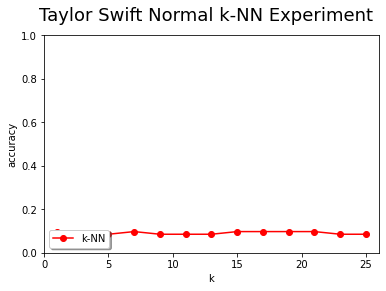

In [12]:
k_vals = range(1,26,2)
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['album_name'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Taylor Swift Normal k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,26,0,1])

plt.show()

In [19]:
#Weighted kNN.
def classify_wkNN(new_example,train_data,k, weights="distance"):

    train_data_copy = data_copy.copy() 
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['duration_ms']-train_data_copy['duration_ms'])**2
        +(new_example['danceability']-train_data_copy['danceability'])**2
        +(new_example['acousticness']-train_data_copy['acousticness'])**2
        +(new_example['energy']-train_data_copy['energy'])**2
        +(new_example['key']-train_data_copy['key'])**2
        +(new_example['speechiness']-train_data_copy['speechiness'])**2
        +(new_example['instrumentalness']-train_data_copy['instrumentalness'])**2
        +(new_example['tempo']-train_data_copy['tempo'])**2)
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    prediction = sorted_data.iloc[0:k]['album_name'].mode().iloc[0] 
    return prediction

In [20]:
def accuracy(actual,predicted):
    num_correct = 0
    for i in range(len(actual)):
      if actual.iloc[i] == predicted.iloc[i]:
        num_correct +=1
    frac_correct = num_correct/len(actual)
    return frac_correct

In [21]:
def classify_all_wkNN(test_data, train_data, k):
    results = []
    for i in range(len(test_data)):
      prediction = classify_wkNN(test_data.iloc[i], train_data, k)
      results.append(prediction)
    return pandas.Series(results)

In [27]:
predictions5NN = classify_all_wkNN(test_data,train_data,7)


# print out the accuracy...
acc = accuracy(test_data['album_name'],predictions5NN)
print("accuracy:", acc)

accuracy: 0.0975609756097561


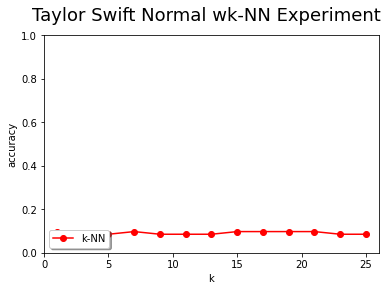

In [23]:
k_vals = range(1,26,2)
wkNN_accuracies = []

for k in k_vals:
    predictions = classify_all_wkNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['album_name'],predictions)
    wkNN_accuracies.append(current_accuracy)


plt.suptitle('Taylor Swift Normal wk-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,26,0,1])

plt.show()

Both kNN and weighted kNN returned low accuracy scores of about 9.75%, so I will try a different method. Next, I will try decision trees and random forests.

In [120]:
# Decision Tree
ts_album_data = pd.read_csv('/content/drive/MyDrive/CS167/Taylor Swift Spotify Data.csv')

#2. split data
predictors = ['duration_ms', 'danceability', 'acousticness', 'energy', 'key', 'speechiness', 'instrumentalness', 'tempo', 'explicit']
target = "album_name"
train_data, test_data, train_sln, test_sln = \
        train_test_split(ts_album_data[predictors], ts_album_data[target], test_size = 0.33, random_state=41)

dt = tree.DecisionTreeClassifier(random_state=41, criterion="entropy", max_leaf_nodes=18)

dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
ts_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,ts_predictions))



Accuracy: 0.2413793103448276


In [121]:
#Plot the tree.
import matplotlib.pyplot as plt
fn=['duration_ms', 'danceability', 'acousticness', 'energy', 'key', 'speechiness', 'instrumentalness', 'tempo', 'explicit']
cn=['Red (Deluxe Edition)', 'reputation', "Red (Taylor's Version)",
       'Taylor Swift', 'evermore (deluxe version)', 'Lover',
       '1989 (Deluxe)', 'Midnights (3am Edition)',
       'folklore (deluxe version)', 'Speak Now (Deluxe Edition)',
       'Fearless', "Fearless (Taylor's Version)",
       'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (80,20), dpi=400,)
tree.plot_tree(dt, 
               feature_names = fn, 
               class_names=cn,
               fontsize = 32,
               filled = True);

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [138]:
#Random Forest construction
forest = RandomForestClassifier(random_state = 41, n_estimators=35, criterion='entropy')
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)
print("RANDOM FOREST accuracy score: ", metrics.accuracy_score(test_sln,predictions))


RANDOM FOREST accuracy score:  0.26436781609195403


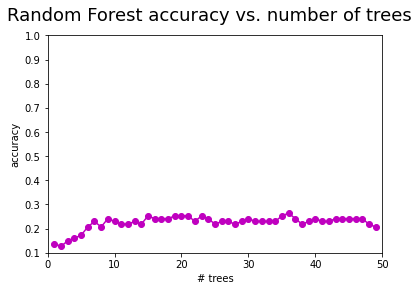

In [143]:
def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'mo-')
    plt.axis([0,n_estimator_values[-1]+1,.10,1])

    plt.show()
    
tune_number_of_trees(range(1,50))

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

*your answer here*

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

*your answer here*